In [1]:
import numpy as np

from box.boxio import generate_integrated_xyxy_list,parse_detections

/home/okano/dev/SSD-background-patches/venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
base_path = "../datasets/casia/test_face_moving/detection/"
det_path = "../fp_det.csv"

In [3]:

# 検出を統合したリストの作成
base_conf_list, base_box_list = generate_integrated_xyxy_list(base_path)
base_conf_list = base_conf_list.numpy()
base_box_list = base_box_list.numpy()

conf_list, box_list = parse_detections(det_path,",")
conf_list = conf_list.numpy()
box_list = box_list.numpy()

x_grid_min = min([min(box_list[:,0]),min(base_box_list[:,0])])
x_grid_max = max([max(box_list[:,0]),max(base_box_list[:,0])])
y_grid_min = min([min(box_list[:,1]),min(base_box_list[:,1])])
y_grid_max = max([max(box_list[:,1]),max(base_box_list[:,1])])

In [6]:
def calc_freq(box_list,x_min,y_min,x_max,y_max):
    # 座標を分割し、グリッドを作成する
    x_grid = np.linspace(x_min, x_max, num=100)
    y_grid = np.linspace(y_min, y_max, num=100)
    x_mesh_grid, y_mesh_grid = np.meshgrid(x_grid, y_grid)

    # 分割した座標に合わせて元の座標を変換する
    x_indices = np.digitize(box_list[:,0], x_grid) - 1
    y_indices = np.digitize(box_list[:,1], y_grid) - 1

    grid_freq = np.zeros((len(y_grid), len(x_grid)), dtype=int)
    for i in range(len(x_indices)):
        grid_freq[y_indices[i], x_indices[i]] += 1
    return grid_freq,x_mesh_grid,y_mesh_grid

In [14]:
base_freq,_,_ = calc_freq(base_box_list,x_grid_min,y_grid_min,x_grid_max,y_grid_max)
np.place(base_freq,base_freq==0,1)
freq,x_mesh_grid,y_mesh_grid = calc_freq(box_list,x_grid_min,y_grid_min,x_grid_max,y_grid_max)

normalize_freq = freq/base_freq

In [11]:
import matplotlib.pyplot as plt

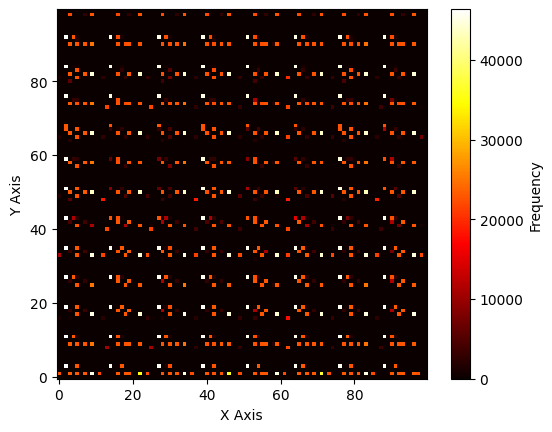

In [15]:
plt.figure()
plt.imshow(normalize_freq, origin='lower', cmap='hot')
plt.colorbar(label='Frequency')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.show()

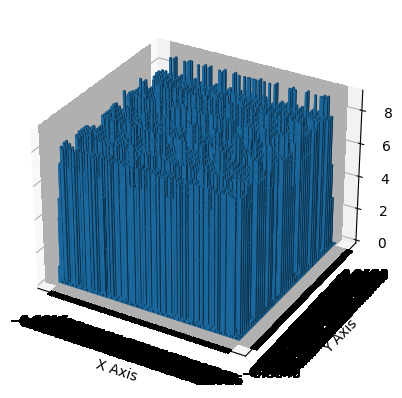

In [8]:
# グリッドポイントの頻度を3Dグラフとしてプロット
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 頻度を3Dバーとしてプロット
ax.bar3d(x_mesh_grid.flatten(), y_mesh_grid.flatten(), np.zeros_like(grid_freq).flatten(),
         (np.ones_like(grid_freq)/grid_freq.shape[1]).flatten(), (np.ones_like(grid_freq)/grid_freq.shape[0]).flatten(), grid_freq.flatten(), shade=True)

# 軸ラベルの設定
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Frequency')

# グリッドの設定
ax.set_xticks(x_mesh_grid.flatten())
ax.set_yticks(y_mesh_grid.flatten())

# グラフの表示
plt.show()